In [1]:
import re , pandas as pd , numpy , string , nltk

In [2]:
stopwords = nltk.corpus.stopwords.words('english')
lem = nltk.WordNetLemmatizer()
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sriva\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [3]:
df = pd.read_csv('news.csv')
df = df.drop(['Unnamed: 0'] , axis = 1)
df

,title,text,label
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL
...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL


In [4]:
def clean_text(text):
    text="".join([word.lower()for word in text if word not in string.punctuation])
    tokens=re.split('\W+',text)
    text=[lem.lemmatize(word)for word in tokens if word not in stopwords]
    return text

In [5]:
text = []
for i in df['text']:
    text.append(clean_text(i))

In [6]:
len(text[0])

671

In [7]:
df['clean_data'] = pd.Series(text)

In [8]:
df

,title,text,label,clean_data
0,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE,"[daniel, greenfield, shillman, journalism, fel..."
1,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE,"[google, pinterest, digg, linkedin, reddit, st..."
2,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL,"[u, secretary, state, john, f, kerry, said, mo..."
3,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE,"[, kaydee, king, kaydeeking, november, 9, 2016..."
4,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL,"[primary, day, new, york, frontrunners, hillar..."
...,...,...,...,...
6330,State Department says it can't find emails fro...,The State Department told the Republican Natio...,REAL,"[state, department, told, republican, national..."
6331,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...,FAKE,"[p, pb, stand, plutocratic, pentagon, posted, ..."
6332,Anti-Trump Protesters Are Tools of the Oligarc...,Anti-Trump Protesters Are Tools of the Oligar...,FAKE,"[, antitrump, protester, tool, oligarchy, refo..."
6333,"In Ethiopia, Obama seeks progress on peace, se...","ADDIS ABABA, Ethiopia —President Obama convene...",REAL,"[addis, ababa, ethiopia, president, obama, con..."


In [9]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect=CountVectorizer(analyzer=clean_text)
X_counts=count_vect.fit_transform(df['text'])


In [10]:
X_counts.toarray()

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [11]:
count_vect.get_feature_names()[0]

C:\Users\sriva\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


''

In [12]:
#count_vect.get_feature_names()

df2 = pd.DataFrame(X_counts.toarray())
df2.columns= [count_vect.get_feature_names()]
df2

,,0,00,000,0000,0000000031,000000031,0000035,00001400,00006,...,عربي,عن,لم,ما,محاولات,من,هذا,والمرضى,ยงade,⅔
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6330,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6331,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6332,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6333,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df3.to_csv('countvec.csv')

KeyboardInterrupt: 

In [32]:
df3 = df2
df3['label'] = df['label']

In [13]:
df2.sum()

           1836
0           545
00            9
000           3
0000          5
           ... 
من            1
هذا           1
والمرضى       1
ยงade         1
⅔             2
Length: 76543, dtype: int64

In [14]:
y = df.iloc[:,2]
y

0       FAKE
1       FAKE
2       REAL
3       FAKE
4       REAL
        ... 
6330    REAL
6331    FAKE
6332    FAKE
6333    REAL
6334    REAL
Name: label, Length: 6335, dtype: object

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
y

array([0, 0, 1, ..., 0, 1, 1])

In [16]:
df2.values

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [2, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [17]:
x = df2.values

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state=0)

In [18]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train,y_train)

GaussianNB()

In [19]:
y_pred = classifier.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix ,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm , display_labels=['True','Spam'])

In [21]:
import seaborn as sns
cm

array([[451, 164],
       [ 58, 594]], dtype=int64)

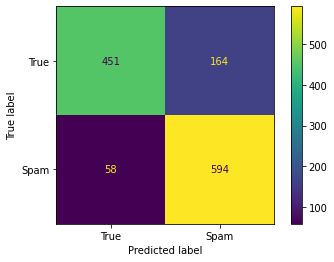

In [22]:
disp.plot()

In [23]:
from sklearn.metrics import classification_report

cr = classification_report(y_test, y_pred)

In [24]:
print(cr)

              precision    recall  f1-score   support

           0       0.89      0.73      0.80       615
           1       0.78      0.91      0.84       652

    accuracy                           0.82      1267
   macro avg       0.83      0.82      0.82      1267
weighted avg       0.83      0.82      0.82      1267

